
# BDAT 1004 – Data Programming

## Problem Set 3 

## Author - Trupal Vijaykumar Chaudhary

## ID - 200557631

# -----------------------------------------------------------------------------------------

In [209]:
q1='''
Question 1:
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men
'''

'\nQuestion 1:\nStep 1. Import the necessary libraries\nStep 2. Import the dataset from this address.\nStep 3. Assign it to a variable called users\nStep 4. Discover what is the mean age per occupation\nStep 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages\nStep 7. For each combination of occupation and sex, calculate the mean age\nStep 8. For each occupation present the percentage of women and men\n'

In [6]:
#step 1-2-3

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter="|")



In [7]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
#step 4
print(users.groupby("occupation")["age"].mean())


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [18]:
#step 5
male_ratio_by_occupation = pd.pivot_table(users, values='gender', index='occupation', aggfunc=lambda x: sum(x=='M') / len(x) * 100)
male_ratio_by_occupation.sort_values(by='gender', ascending=False, inplace=True)
print(male_ratio_by_occupation)


                   gender
occupation               
doctor         100.000000
engineer        97.014925
technician      96.296296
retired         92.857143
programmer      90.909091
executive       90.625000
scientist       90.322581
entertainment   88.888889
lawyer          83.333333
salesman        75.000000
educator        72.631579
student         69.387755
other           65.714286
marketing       61.538462
writer          57.777778
none            55.555556
administrator   54.430380
artist          53.571429
librarian       43.137255
healthcare      31.250000
homemaker       14.285714


In [21]:
#step 6

age_summary_by_occupation = users.groupby("occupation")["age"].agg(["min", "max"])
print(age_summary_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [23]:
#step 7
mean_age_by_occupation_and_gender = users.groupby(["occupation", "gender"])["age"].mean().unstack()
print(mean_age_by_occupation_and_gender)

gender                 F          M
occupation                         
administrator  40.638889  37.162791
artist         30.307692  32.333333
doctor               NaN  43.571429
educator       39.115385  43.101449
engineer       29.500000  36.600000
entertainment  31.000000  29.000000
executive      44.000000  38.172414
healthcare     39.818182  45.400000
homemaker      34.166667  23.000000
lawyer         39.500000  36.200000
librarian      40.000000  40.000000
marketing      37.200000  37.875000
none           36.500000  18.600000
other          35.472222  34.028986
programmer     32.166667  33.216667
retired        70.000000  62.538462
salesman       27.000000  38.555556
scientist      28.333333  36.321429
student        20.750000  22.669118
technician     38.000000  32.961538
writer         37.631579  35.346154


In [38]:
#step 8
print((pd.crosstab(users["occupation"], users["gender"], normalize="index").mul(100).round(2)).astype(str) + '%')

gender              F       M
occupation                   
administrator  45.57%  54.43%
artist         46.43%  53.57%
doctor           0.0%  100.0%
educator       27.37%  72.63%
engineer        2.99%  97.01%
entertainment  11.11%  88.89%
executive       9.38%  90.62%
healthcare     68.75%  31.25%
homemaker      85.71%  14.29%
lawyer         16.67%  83.33%
librarian      56.86%  43.14%
marketing      38.46%  61.54%
none           44.44%  55.56%
other          34.29%  65.71%
programmer      9.09%  90.91%
retired         7.14%  92.86%
salesman        25.0%   75.0%
scientist       9.68%  90.32%
student        30.61%  69.39%
technician       3.7%   96.3%
writer         42.22%  57.78%


# -----------------------------------------------------------------------------------------

In [41]:
q2='''
Question 2:
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
'''

In [45]:
#step 1
import pandas as pd

# Step 2
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

#step 3
euro12 = pd.read_csv(url)

In [46]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [47]:
#step 4
goals = euro12["Goals"]
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [54]:
# Step 5
print(f"Total Teams = {len(euro12['Team'].unique())}")

Total Teams = 16


In [55]:
# Step 6
num_cols = euro12.shape[1]
print(f"Number of columns = {num_cols}")

Number of columns = 35


In [59]:
# Step 7
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [58]:
# Step 8
discipline = discipline.sort_values(by=["Red Cards", "Yellow Cards"], ascending=False)
print(discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [61]:
# Step 9
print(discipline.groupby("Team")["Yellow Cards"].mean())

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [62]:
# Step 10
print(euro12[euro12["Goals"] > 6]["Team"])


5     Germany
13      Spain
Name: Team, dtype: object


In [63]:
# Step 11
print(euro12[euro12["Team"].str.startswith("G")]["Team"])


5    Germany
6     Greece
Name: Team, dtype: object


In [64]:
# Step 12
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [65]:
# Step 13
euro12.iloc[:, :-3]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [66]:
# Step 14
euro12.query("Team in ['England', 'Italy', 'Russia']")[['Team', 'Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# -----------------------------------------------------------------------------------------

In [67]:
q3 = '''

Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
    The first a random number from 1 to 4
    The second a random number from 1 to 3
    The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299
'''

In [69]:
# Step 1,2

import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(786)

# Create the first Series with random numbers from 1 to 4
s1 = pd.Series(np.random.randint(1, 5, size=100))

# Create the second Series with random numbers from 1 to 3
s2 = pd.Series(np.random.randint(1, 4, size=100))

# Create the third Series with random numbers from 10,000 to 30,000
s3 = pd.Series(np.random.randint(10000, 30001, size=100))


In [73]:
# Step 3
df = pd.concat([s1, s2, s3], axis=1)

In [74]:
# Step 4

# Rename the columns of the DataFrame
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df)

    bedrs  bathrs  price_sqr_meter
0       3       1            15211
1       4       2            11961
2       3       3            25877
3       4       2            25586
4       4       3            29080
..    ...     ...              ...
95      3       1            10458
96      3       1            16844
97      3       1            25782
98      3       1            10179
99      4       1            10812

[100 rows x 3 columns]


In [76]:
# Step 5

# Concatenate the three Series into a single
bigseries = pd.concat([s1, s2, s3])

# Create a new DataFrame with a single column 'bigcolumn'
df = pd.DataFrame(bigseries, columns=['bigcolumn'])

# Print the resulting DataFrame
print(df)


    bigcolumn
0           3
1           4
2           3
3           4
4           4
..        ...
95      10458
96      16844
97      25782
98      10179
99      10812

[300 rows x 1 columns]


In [77]:
# Step 6 -  Yes it is true because we didnot reset the index while concatenating

In [79]:
# Step 7
df = df.reset_index()
print(df)

     level_0  index  bigcolumn
0          0      0          3
1          1      1          4
2          2      2          3
3          3      3          4
4          4      4          4
..       ...    ...        ...
295      295     95      10458
296      296     96      16844
297      297     97      25782
298      298     98      10179
299      299     99      10812

[300 rows x 3 columns]


# -----------------------------------------------------------------------------------------

In [80]:
q4='''
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
'''

In [120]:
# Step 1
import pandas as pd
import numpy as np
import datetime

In [117]:
# step 2
data=pd.read_csv('wind.txt',sep="\s+",parse_dates=[[0,1,2]])


In [121]:
#Step 3
def Yearschange(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(Yearschange)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [123]:
#Step 4
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [129]:
#Step 5
pd.to_datetime(data.index)

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Yr_Mo_Dy', length=6574, freq=None)

In [131]:
#Step 6
data.isna().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [134]:
data.notnull().sum().sum()

78857

In [135]:
#Step 8
data.mean().mean()

10.227982360836924

In [136]:
#step 9
loc_stats = pd.DataFrame({'min': data.min(), 'max': data.max(), 'mean': data.mean(), 'std': data.std()})


In [137]:
#step 10
day_stats = pd.DataFrame({'min': data.min(axis=1), 'max': data.max(axis=1), 'mean': data.mean(axis=1), 'std': data.std(axis=1)})


In [138]:
#step 11
data.loc[data.index.month == 1].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [139]:
#step 12
data.groupby(pd.Grouper(freq='A')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [140]:
#step 13
data.groupby(pd.Grouper(freq='M')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [142]:
#step 14
data.groupby(pd.Grouper(freq='W')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [145]:
#Step 15
processed_data = data[data.index < pd.to_datetime('1962-01-01')]
processed_data.resample('W').mean()
processed_data.resample('W').min()
processed_data.resample('W').max()
processed_data.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283


# -----------------------------------------------------------------------------------------

In [146]:
q5='''
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset? Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?
'''

In [148]:
#Step 1-2-3
import numpy as ny
import pandas as ps

chipotle_data=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")


In [149]:
#Step 4
chipotle_data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [151]:
#Step 5
chipotle_data.shape[0]

4622

In [152]:
#Step 5
chipotle_data.shape[1]

5

In [154]:
#Step 7
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [155]:
#Step 8
chipotle_data.index

RangeIndex(start=0, stop=4622, step=1)

In [157]:
#step 9
print(chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1))


              order_id  quantity
item_name                       
Chicken Bowl    713926       761


In [160]:
#step 10
most_ordered_item = chipotle_data.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)
num_items_ordered = most_ordered_item.loc[most_ordered_item.index[0], 'quantity']
print(num_items_ordered)

761


In [162]:
#Step 11
print(chipotle_data.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1))


                    order_id  quantity
choice_description                    
[Diet Coke]           123455       159


In [163]:
#Step 12
chipotle_data['quantity'].sum()

4972

In [164]:
#Step 13
chipotle_data['item_price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:-1]))
print(chipotle_data['item_price'].dtype)

float64


In [165]:
#Step 14
revenue = (chipotle_data['quantity'] * chipotle_data['item_price'])
revenue.sum()

39237.02

In [166]:
#Step 15
len(chipotle_data['order_id'].unique())

1834

In [167]:
# Calculate total revenue
chipotle_data['revenue'] = chipotle_data['item_price'] * chipotle_data['quantity']
total_revenue = chipotle_data['revenue'].sum()

# Calculate total number of orders
total_orders = chipotle_data['order_id'].nunique()

# Calculate average revenue per order
avg_revenue_per_order = total_revenue / total_orders

print(f"The average revenue amount per order is ${avg_revenue_per_order:.2f}")


The average revenue amount per order is $21.39


In [169]:
#Step 17
len(chipotle_data['item_name'].unique())

50

# -----------------------------------------------------------------------------------------

In [170]:
q6='''
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!
'''

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=ps.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


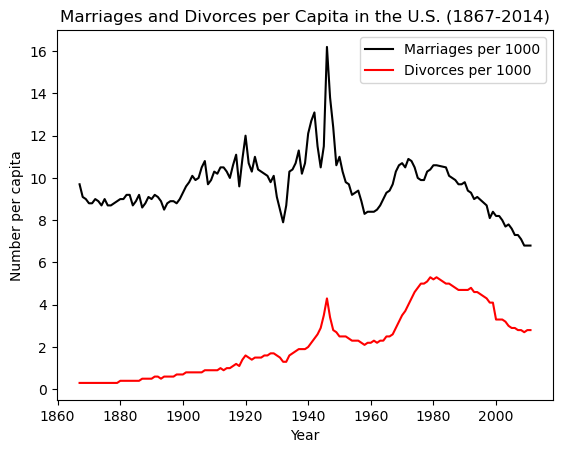

In [183]:
marriage_color = 'black'
divorce_color = 'red'

# Create the line plot using Seaborn
sns.lineplot(data=data, x='Year', y='Marriages_per_1000', color=marriage_color, label='Marriages per 1000')
sns.lineplot(data=data, x='Year', y='Divorces_per_1000', color=divorce_color, label='Divorces per 1000')

# Set the plot title and labels
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number per capita')

# Show the legend and plot
plt.legend()
plt.show()

In [ ]:
q7='''
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!
'''

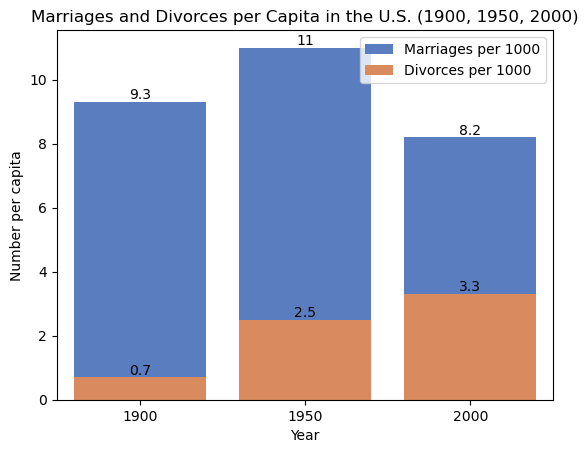

In [187]:

import seaborn as sns

# Filter data for years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Set the color palette
palette = sns.color_palette("muted", 2)

# Create the bar chart using Seaborn
ax = sns.barplot(data=filtered_data, x='Year', y='Marriages_per_1000', color=palette[0], label='Marriages per 1000')
ax = sns.barplot(data=filtered_data, x='Year', y='Divorces_per_1000', color=palette[1], label='Divorces per 1000')

# Add data labels
for p in ax.containers:
    ax.bar_label(p, label_type='edge')

# Set the plot title and labels
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Number per capita')

# Show the legend and plot
plt.legend()
plt.show()


In [189]:
q8='''
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!
'''

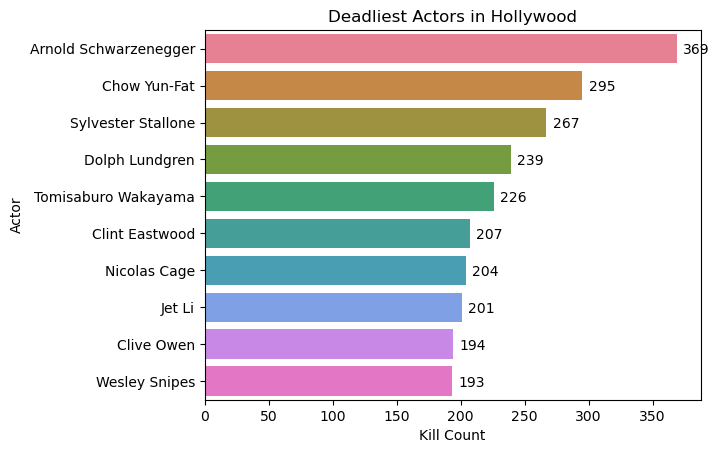

In [194]:
deadly_actor_data= pd.read_csv('actor_kill_counts.csv')
data = deadly_actor_data.sort_values(by='Count', ascending=False)

palette = sns.color_palette('husl', len(data))


# Create the horizontal bar chart using Seaborn
sns.barplot(data=data, x='Count', y='Actor', palette=palette)

for i, v in enumerate(data['Count']):
    plt.text(v + 5, i + .15, str(v), color='black', fontsize=10)

# Set the plot title and labels
plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Kill Count')
plt.ylabel('Actor')

# Show the plot
plt.show()


In [195]:
q9='''
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown 
of the categories.'''

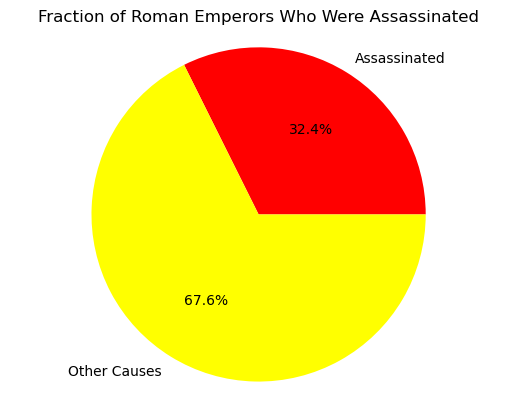

In [202]:
emperor_data= pd.read_csv('roman-emperor-reigns.csv')
# Count the number of emperors who were assassinated
assassinated_count = len(emperor_data[emperor_data['Cause_of_Death'].str.contains('Assassinated')])

# Count the number of emperors who died from other causes
other_count = len(emperor_data) - assassinated_count

# Create the data for the pie chart
sizes = [assassinated_count, other_count]
labels = ['Assassinated', 'Other Causes']

colors = ['red', 'yellow']


# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

# Set the plot title
plt.title('Fraction of Roman Emperors Who Were Assassinated')

# Make the pie chart an even circle
plt.axis('equal')

# Show the plot
plt.show()

In [203]:
q10='''
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.
'''

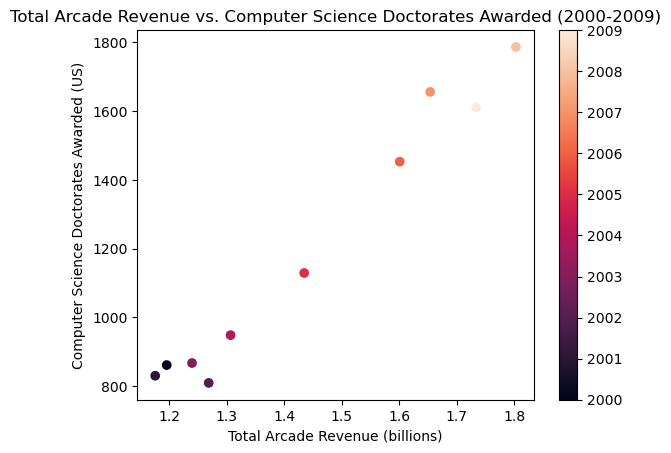

In [208]:
revenue_data= pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
# Extract the x and y values
x = revenue_data['Total Arcade Revenue (billions)']
y = revenue_data['Computer Science Doctorates Awarded (US)']

# Extract the color values
colors = revenue_data['Year']

# Create the scatter plot
plt.scatter(x, y, c=colors, cmap='rocket')

# Add a colorbar legend
plt.colorbar()

# Set the plot title and axis labels
plt.title('Total Arcade Revenue vs. Computer Science Doctorates Awarded (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Show the plot
plt.show()